[1.         0.95891061 0.92410366 0.89513767 0.87157119 0.85296273
 0.83887083 0.82885403 0.82247085 0.81927982 0.81883949 0.82070837
 0.824445   0.82960792 0.83575565 0.84244673 0.84923968 0.85569304
 0.86136534 0.86581512 0.8686018  0.86947682 0.86861991 0.86626881
 0.86266122 0.85803486 0.85262744 0.84667667 0.84042027 0.83409595
 0.82794143 0.82219442 0.81709263 0.81287378 0.80977557 0.80803574
 0.80789198 0.80958201 0.81334354 0.8194143  0.82802173 0.83899429
 0.85164217 0.86524091 0.87906604 0.8923931  0.90449763 0.91465518
 0.92214128 0.92623146 0.92623146 0.92214128 0.91465518 0.90449763
 0.8923931  0.87906604 0.86524091 0.85164217 0.83899429 0.82802173
 0.8194143  0.81334354 0.80958201 0.80789198 0.80803574 0.80977557
 0.81287378 0.81709263 0.82219442 0.82794143 0.83409595 0.84042027
 0.84667667 0.85262744 0.85803486 0.86266122 0.86626881 0.86861991
 0.86947682 0.8686018  0.86581512 0.86136534 0.85569304 0.84923968
 0.84244673 0.83575565 0.82960792 0.824445   0.82070837 0.8188

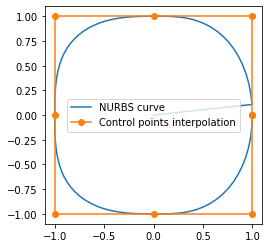

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = 3 #order of the polynomial

n = 9 #number of basis vector

knot_vect = np.array([0,0,0,0,0.2,0.4,0.5,0.6,0.8,1,1,1,1])

ctrlpts = np.array([[1,0],[1,-1],[0,-1],[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0]])

w = np.array([1,1/(2**(0.5)),1,1/(2**(0.5)),1,1/(2**(0.5)),1,1/(2**(0.5)),1])

#Calculating the basis vector

def coxDeBoor(zeta, i, d):
    
    if d==0:
        if knot_vect[i] <= zeta and zeta < knot_vect[i+1]:
            return 1
        return 0
    
    D1 = knot_vect[i+d] - knot_vect[i]
    D2 = knot_vect[i+d+1] - knot_vect[i+1]
    
    E1 = 0
    E2 = 0
    
    if D1 > 0:
        E1 = (zeta - knot_vect[i])/D1 * coxDeBoor(zeta, i, d-1)
    
    if D2 > 0:
        E2 = (knot_vect[i+d+1] - zeta)/D2 * coxDeBoor(zeta, i+1, d-1)
        
    return E1+E2

zeta = np.linspace(0,1,100)
N = np.zeros((100,n))
Wtd_N = np.zeros((100,n))
Curve = np.zeros((100,2))

for z in range(len(zeta)):
    for i in range(n):
        N[z,i] = coxDeBoor(zeta[z], i, p)
        Wtd_N[z,i] = N[z,i]*w[i]
    #print(Wtd_N[z])
    
Wtd_sum = np.sum(Wtd_N,1)
print(Wtd_sum)
for z in range(len(zeta)):        
    for i in range(n):
        if Wtd_sum[z] != 0:
            Curve[z] = Curve[z] + Wtd_N[z,i]/Wtd_sum[z] * ctrlpts[i]
        
plt.plot(Curve[:,0],Curve[:,1], label='NURBS curve')
plt.plot(ctrlpts[:,0],ctrlpts[:,1], label='Control points interpolation', marker='o')
plt.legend()
plt.axis('scaled')
plt.show()